## Week 3 Challenges

## Challenge 1

**What happens if you have non-numerical attributes?**

Please extend the `data_description` function to only accept numerical columns and calculate mean and counts. The outcome should be a table with Mean and Counts per Column.

In [1]:
# import relevant libraries
import pandas as pd

# import data for the challenge
listings =pd.read_csv("listings.csv")

# Subset data
subset_listings = listings[['id', 
                            'neighbourhood_cleansed',
                            'latitude',
                            'longitude',
                            'property_type',
                            'room_type',
                            'bedrooms',
                            'price',
                            'number_of_reviews']]

# cleaning data
subset_listings.loc[subset_listings.index, 'price'] = subset_listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Remove any records that are not complete
subset_listings = subset_listings.dropna()

In [2]:
def data_description(x):
    subset = x.select_dtypes(include = 'number')
    stats = {'M': subset.mean(), 'S': len(subset)}
    return stats

result = data_description(subset_listings)
print(result)

{'M': id                   7.418371e+06
latitude             5.236557e+01
longitude            4.889060e+00
bedrooms             1.428344e+00
number_of_reviews    1.541693e+01
dtype: float64, 'S': 13837}


## Challenge 2

Now is your turn to find, read, process and then make a comprehensive descriptive statistics analysis based on the previous resources and others you might need to look at. Create insightful visualizations combining both maps and charts to convey meaningful information about a chosen city.

1. Define a problem within the urban environment and choose a dataset related to urban life or city dynamics. This could include data on crime rates, housing prices, transportation, demographics, or any other urban-related dataset.
2. Get the data ideally using an **API, or web services**. But it's fine if you need to download the data. Describe why you had to use the traditional  method.
3. Work with the data cleaning and pre-processing, check for missing values, convert data types, and perform any other necessary preprocessing steps. You have the code for that in this and previous labs.
4. Use Pandas to calculate descriptive statistics such as `mean`, `median`, `standard deviation`, and other relevant measures. Explore `correlations` between different variables (Include at least one `univariate` and `bivariate` plots) 
6. Create at least one (or more) interactive map to visualize spatial aspects of the data. For example, plot crime rates across different neighbourhoods or visualize housing prices.
7. Complement with additional charts (line charts, bar charts, etc.) to extend the map and highlight key trends or patterns in the data.
8. As always, document well what you are doing and how you use `descriptive statistics and map visualizations` to extract insights from the data.
> You could try explaining any observed patterns, trends, or correlations, whether they are spatial or non-spatial. **Keep in mind** the defined problem and whether your analysis provides the required insights (Your conclusion could be that you need more data or another type of analysis)

### Problem description

In Challenges 2 and 4 I decided to map and analyse the distribution and health of green spaces in New York, using the [Forestry Tree Points](https://data.cityofnewyork.us/Environment/Forestry-Tree-Points/hn5i-inap/about_data) dataset from NYC Open Data website, containing more than a million individual tree records.

I chose this dataset because tree canopy is an important factor for mitigating the Urban Heat Island Effect, which is particularly relevant in  
a big city such as New York which has a high density of built infrastructure and impervious surfaces.

Equal access and distribution of well-maintained green spaces is also important from a social justice perspective, which is why in the future this analysis could be supplemented with adding neighbourhood shapefiles and performing spatial analysis of tree quality distribution, in order to determine whether there are particular neighbourhoods where greenery tends to be of poorer quality than the city average.

In [3]:
# import relevant libraries

import requests
import pandas as pd
import geopandas as gpd
from sodapy import Socrata
import matplotlib.pyplot as plt

In [16]:
# getting the data from the API, using a token

client = Socrata("data.cityofnewyork.us",
                "ZgLRDvrVZFrqMyML66xV1J3wZ",
                username="kk232@st-andrews.ac.uk",
                password="Udaje123")

url_trees = client.get("hn5i-inap", limit = 2000000)

# converting into a pandas dataframe
trees_df = pd.DataFrame.from_records(url_trees)

In [8]:
# checking the structure of the data by displaying head

trees_df.head()

,objectid,dbh,tpstructure,tpcondition,plantingspaceglobalid,geometry,globalid,genusspecies,createddate,updateddate,location,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,riskrating,riskratingdate,planteddate,stumpdiameter
0,86823,20,Full,Excellent,E814CD37-9F53-4D79-AF86-3B454F9D29B9,POINT (-73.8165687459639202 40.7162906546850749),2B457A4C-E0E4-4E17-81C4-A5449F51C804,Acer nigrum - black maple,2015-02-28 05:00:00.0000000,2016-10-20 17:43:53.0000000,"{'type': 'Point', 'coordinates': [-73.81656874...",24670,25,3,24,65,NaN,NaN,NaN,NaN
1,87623,10,Retired,Good,A644AB79-A3CB-4F7F-923B-F308E615CCD4,POINT (-73.9384803613519495 40.8129927791458300),37195E1A-A7EE-4AA4-8389-19A0ED5C46F7,Fraxinus pennsylvanica - Green ash,2015-03-03 05:00:00.0000000,2019-09-18 13:12:55.0000000,"{'type': 'Point', 'coordinates': [-73.93848036...",13095,18,4,36,20,NaN,NaN,NaN,NaN
2,88023,24,Retired,Poor,21431016-EDB8-4A0B-B122-673125800C87,POINT (-73.8324418090213044 40.8876250431554311),6BA8E72B-1901-4EF3-ABFF-D11680AB4A9B,Acer platanoides - Norway maple,2015-03-03 05:00:00.0000000,2018-03-27 14:00:42.0000000,"{'type': 'Point', 'coordinates': [-73.83244180...",11275,29,5,2,30,NaN,NaN,NaN,NaN
3,88823,10,Full,Good,96FB6C55-612F-466D-9449-85A3CD2178E1,POINT (-74.2090363523908820 40.5195778140891463),79A5DBAF-F305-4DA1-A4B1-7A8C8D085435,Pyrus calleryana - Callery pear,2015-03-04 05:00:00.0000000,2016-10-12 15:13:11.0000000,"{'type': 'Point', 'coordinates': [-74.20903635...",10696,15,1,9,77,NaN,NaN,NaN,NaN
4,88824,10,Retired,Dead,95F4FC38-D56B-4EF3-845D-C84B3CE54961,POINT (-73.9802780199124044 40.7429717396309101),182F6647-D9C1-4A45-ADA0-9ADEFD1ECC60,Gleditsia triacanthos var. inermis - Thornless...,2015-03-04 05:00:00.0000000,2016-10-24 02:50:43.0000000,"{'type': 'Point', 'coordinates': [-73.98027801...",12078,71,4,50,7,NaN,NaN,NaN,NaN


In [17]:
# data pre-processing:
# subset columns

trees_df.columns # check what columns the data includes

subset_trees = trees_df[["objectid", "dbh", "tpcondition", "geometry", "genusspecies", "riskrating"]]

# check for any missing values
nan_in_column_geometry = subset_trees['geometry'].isna().any()
nan_in_column_genusspecies = subset_trees['genusspecies'].isna().any()
nan_in_column_tpcondition = subset_trees['tpcondition'].isna().any()
nan_in_column_riskrating = subset_trees['riskrating'].isna().any()

print(nan_in_column_geometry, nan_in_column_genusspecies, nan_in_column_tpcondition, nan_in_column_riskrating)

# count missing values

nan_in_column_geometry = subset_trees['geometry'].isna().sum()
nan_in_column_genusspecies = subset_trees['genusspecies'].isna().sum()
nan_in_column_tpcondition = subset_trees['tpcondition'].isna().sum()
nan_in_column_riskrating = subset_trees['riskrating'].isna().sum()

print(nan_in_column_geometry, nan_in_column_genusspecies, nan_in_column_tpcondition, nan_in_column_riskrating)
print(len(subset_trees))

# remove records with missing values for genusspecies and tpcondition

subset_trees = subset_trees.dropna(subset=['genusspecies', 'tpcondition'])

print(len(subset_trees))

False True True True
0 23 9 549407
1040231
1040199


In [18]:
# convert data types
#subset_trees.info()

subset_trees.objectid = subset_trees.objectid.astype(int)
subset_trees.dbh = subset_trees.dbh.astype(float)
subset_trees.tpcondition = subset_trees.tpcondition.astype(str)
subset_trees.genusspecies = subset_trees.genusspecies.astype(str)
subset_trees.riskrating = subset_trees.riskrating.astype(float)

subset_trees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1040199 entries, 0 to 1040230
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   objectid      1040199 non-null  int32  
 1   dbh           1027684 non-null  float64
 2   tpcondition   1040199 non-null  object 
 3   geometry      1040199 non-null  object 
 4   genusspecies  1040199 non-null  object 
 5   riskrating    490814 non-null   float64
dtypes: float64(2), int32(1), object(3)
memory usage: 51.6+ MB


In [11]:
# descriptive statistics
subset_trees.describe()

,objectid,dbh,riskrating
count,1.040199e+06,1.027684e+06,490814.000000
mean,4.313999e+06,1.153344e+01,5.954347
std,3.093986e+06,9.748780e+00,1.946686
min,8.682300e+04,0.000000e+00,0.000000
25%,2.425862e+06,4.000000e+00,5.000000
50%,3.764591e+06,9.000000e+00,6.000000
75%,5.070978e+06,1.700000e+01,7.000000
max,1.485370e+07,2.427000e+03,12.000000


In [12]:
# tree condition value counts
subset_trees.tpcondition.value_counts()

tpcondition
Good         506980
Fair         269384
Dead          98734
Excellent     82999
Poor          46231
Unknown       30088
Critical       5783
Name: count, dtype: int64

In [13]:
# number of uniqie tree species
subset_trees.genusspecies.nunique()

586

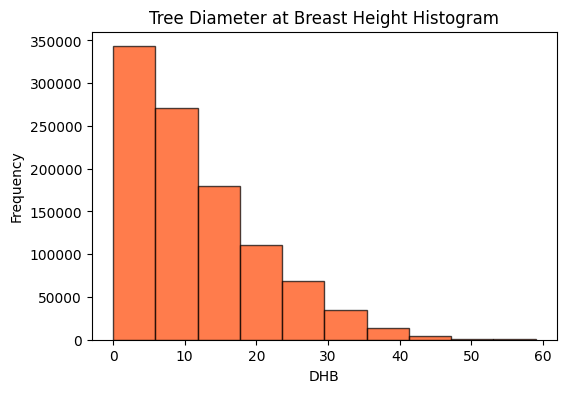

<Axes: ylabel='tpcondition'>

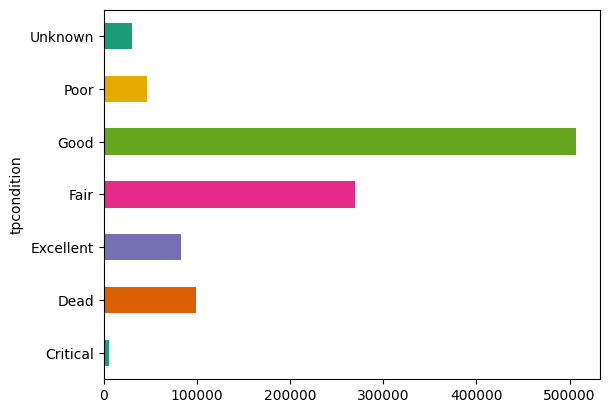

In [14]:
# univariate plots
import matplotlib.pyplot as plt

# Plot a histogram of the 'dbh' attribute 
plt.figure(figsize=(6, 4))
subset_trees[subset_trees['dbh'] < 60].dbh.plot(kind='hist', bins=10, color='#FF4500', alpha=0.7, edgecolor='black')
plt.title('Tree Diameter at Breast Height Histogram')
plt.xlabel('DHB')
plt.ylabel('Frequency')
plt.show()

# tree condition bar plot
import seaborn as sns
subset_trees.groupby('tpcondition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

<Axes: xlabel='dbh', ylabel='riskrating'>

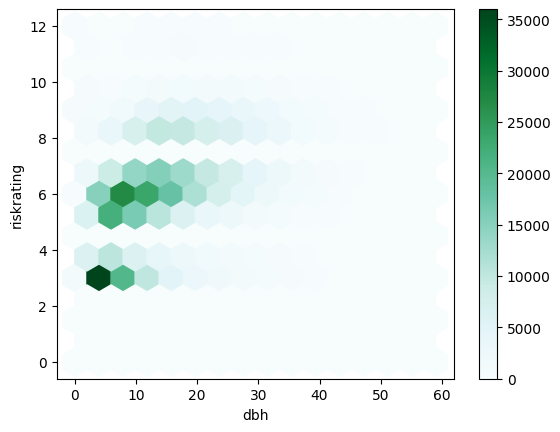

In [15]:
# bivariate plot - relationship btw. tree size and its risk rating

subset_trees[subset_trees['dbh'] < 60].plot.hexbin(x='dbh', y='riskrating', gridsize=15)

The previous graphs suggest that trees in New York of Good and Fair quality and that, fortunately, poorly maintained or dead trees are less common. It also shows that most trees have lower diameter and that big trees with great diameter are rare. The third graph suggests a correlation between tree size and its risk rating, with bigger trees posing greater danger than smaller trees.

## Challenge 3

1. Go to https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data 
2. Get the data for Motor Vehicle Collisions - Crashes Jan 2024. The dataset contains 2.06 M of records.
3. Use the API endpoint to map the data (e.g. https://data.cityofnewyork.us/resource/h9gi-nx95.json) 
   ![image.png](attachment:8b7103ca-9191-4b67-97c2-0cfb8b8468fc.png)
4. Customize the map by representing the data by `number_of_persons_killed` and `number_of_cyclist_killed`
5. Finally, calculate descriptive statistics for at least two attributes, such as `mean`, `standard deviation`, and other relevant measures 6. Justify/Describe the attribute selection.
7. Plot correlations between the chosen attributes and create `univariate` and/or `multivariate` charts to justify your insights.
   > Please take note that the dataset includes various numerical values. Hence, each student's attribute selection, justification, charts, and maps are expected to vary. 

In [4]:
# getting the data from the API, using a token

client = Socrata("data.cityofnewyork.us",
                "ZgLRDvrVZFrqMyML66xV1J3wZ",
                username="kk232@st-andrews.ac.uk",
                password="Udaje123")

url_crashes = client.get("h9gi-nx95", limit = 3000000)

# converting into a pandas dataframe
crashes_df = pd.DataFrame.from_records(url_crashes)

In [5]:
# display head
crashes_df.head()

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,latitude,longitude,location,cross_street_name,contributing_factor_vehicle_3,vehicle_type_code_3,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,QUEENSBORO BRIDGE UPPER,NaN,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-29T00:00:00.000,6:55,THROGS NECK BRIDGE,NaN,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-11T00:00:00.000,9:35,NaN,NaN,0,0,0,0,0,0,...,40.667202,-73.8665,"{'latitude': '40.667202', 'longitude': '-73.86...",1211 LORING AVENUE,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-14T00:00:00.000,8:13,SARATOGA AVENUE,DECATUR STREET,0,0,0,0,0,0,...,40.683304,-73.917274,"{'latitude': '40.683304', 'longitude': '-73.91...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
crashes_df.columns

Index(['crash_date', 'crash_time', 'on_street_name', 'off_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough',
       'zip_code', 'latitude', 'longitude', 'location', 'cross_street_name',
       'contributing_factor_vehicle_3', 'vehicle_type_code_3',
       'contributing_factor_vehicle_4', 'vehicle_type_code_4',
       'contributing_factor_vehicle_5', 'vehicle_type_code_5'],
      dtype='object')

In [6]:
# data pre-processing:

# subset columns
keep_cols = ['collision_id', 'number_of_persons_killed', 'number_of_cyclist_killed', 'latitude', 'longitude', 'vehicle_type_code1', 
             'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2']

crashes_df = crashes_df[keep_cols]

# delete rows with missing location

crashes_df = crashes_df.dropna(subset=['longitude', 'latitude'])

In [8]:
crashes_df.head()

,collision_id,number_of_persons_killed,number_of_cyclist_killed,latitude,longitude,vehicle_type_code1,contributing_factor_vehicle_1,contributing_factor_vehicle_2
3,4456314,0,0,40.667202,-73.8665,Sedan,Unspecified,NaN
4,4486609,0,0,40.683304,-73.917274,NaN,NaN,NaN
6,4486555,0,0,40.709183,-73.956825,Sedan,Passing Too Closely,Unspecified
7,4486660,0,0,40.86816,-73.83148,Sedan,Unspecified,Unspecified
8,4487074,0,0,40.67172,-73.8971,Sedan,Driver Inexperience,Unspecified


In [7]:
# convert into a geodataframe

crashes_gdf = gpd.GeoDataFrame(crashes_df, geometry=gpd.points_from_xy(crashes_df['longitude'], crashes_df['latitude']), crs='EPSG:4326')

In [6]:
# map by number of persons killed

crashes_gdf.explore("number_of_persons_killed", cmap='Oranges', tiles='Esri_WorldGrayCanvas', zoom_start=17)

In [ ]:
# map by number of cyclists killed

crashes_gdf.explore("number_of_cyclists_killed", cmap='Oranges', tiles='Esri_WorldGrayCanvas', zoom_start=17)

In [7]:
# descriptive statistics

crashes_df.describe()

# mean and sd for number of persons killed

# vehicle type counts

,collision_id,number_of_persons_killed,number_of_cyclist_killed,latitude,longitude,vehicle_type_code1,contributing_factor_vehicle_1,contributing_factor_vehicle_2
count,1833026,1832998,1833026,1833026,1833026,1820700,1826906,1543905
unique,1833026,7,3,175553,133328,1507,61,61
top,4456314,0,0,0.0000000,0.0000000,Sedan,Unspecified,Unspecified
freq,1,1830433,1832822,4344,4344,530516,621041,1301571


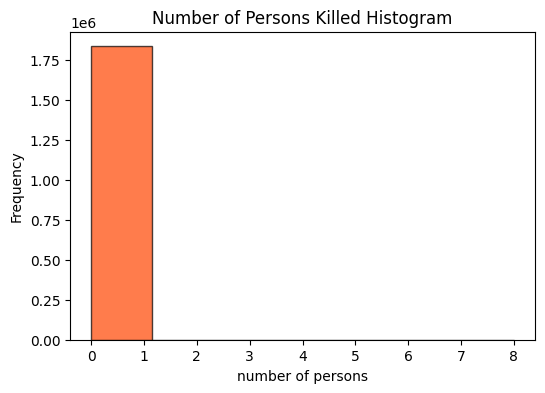

In [14]:
# Plot a histogram of the number of cyclists killed attribute 

crashes_gdf = crashes_gdf.dropna(subset=['number_of_persons_killed', 'latitude', 'longitude'])
crashes_gdf['number_of_persons_killed'] = crashes_gdf['number_of_persons_killed'].astype(int)

plt.figure(figsize=(6, 4))
crashes_gdf.number_of_persons_killed.plot(kind='hist', bins=7, color='#FF4500', alpha=0.7, edgecolor='black')
plt.title('Number of Persons Killed Histogram')
plt.xlabel('number of persons')
plt.ylabel('Frequency')
plt.show()

In [15]:
crashes_gdf.contributing_factor_vehicle_1.nunique()

61

## Challenge 4

1. You worked with two modern libraries to map big data. Can you describe the differences between working with Longboard and Datashader? Which one provides the most exciting functionality, and how do the outcomes from both of them vary?
2. Find a large dataset with at least 5 million records. Consider open datasets, government datasets, or any dataset of interest to you. Ensure the dataset is in a format that can be easily loaded into a Pandas DataFrame (Parquet file or another format).
3. Define a potential problem or scenario for mapping this dataset.
4. Load the dataset into a Pandas DataFrame and explore its structure. Here, **I advice you! to take a small portion of that rather than work with the entire table.**
5. Identify key variables of interest that could be effectively visualized using Datashader(https://datashader.org/index.html#). (e.g. is fine if the datasets have only locations, but we are aiming for at least one additional variable to represent in the map. 
6. Use the previous steps and the Datashader documentation to implement a `hvplot` Map.
7. Discuss/Write any challenges you have encountered related to the challenges and how you addressed them.
8. As always. Provide clear comments and/or citations in your code, explaining each step of the Datashader implementation (**Note: You don't need to run the Datashader pipeline**)
   
9. **For next week**, create a **four-slide presentation** summarizing the problem, data source, dataset, challenges, map, and insights from visualizing the large dataset. **Two slides for Challenge 2** and the **other two for this challenge**. You can also use the Notebooks as a tool to make your presentation. 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
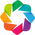

In [25]:
# import packages

import holoviews as hv, pandas as pd, colorcet as cc
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

In [20]:
# convert to geodataframe

from shapely import wkt

subset_trees["geometry"] = gpd.GeoSeries.from_wkt(subset_trees["geometry"])
gdf = gpd.GeoDataFrame(subset_trees, geometry="geometry")

In [21]:
# extract point coordinates from geometry

gdf['lon'] = gdf.geometry.apply(lambda p: p.x)
gdf['lat'] = gdf.geometry.apply(lambda p: p.y)

map_tiles = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
plot = gdf.hvplot.points("lon", "lat", c='tpcondition', geo = True)
map_tiles * plot

### Final map screenshot

![Map](final_screenshot.png)